In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(r"/content/gdrive/MyDrive/ml/Data_Train.xlsx")

# lets read the data

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#lets deal with missing values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df["Route"].isnull().sum()

1

In [ ]:
df[df["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
df["Total_Stops"].isnull().sum()

1

In [ ]:
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [ ]:
train_data = df.copy()

# lets perform preprocess and extract derived attributes from date of Journey

In [ ]:
train_data["Date_of_Journey"]

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [ ]:
# we need to extract day, month and year uding the dt method

train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])

<ipython-input-19-9d8081d6f320>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])


In [ ]:
train_data["Day_of_Journey"] = train_data["Date_of_Journey"].dt.day
train_data["Month_of_Journey"] = train_data["Date_of_Journey"].dt.month
train_data["Year_of_Journey"] = train_data["Date_of_Journey"].dt.year

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


# lets clean arrival and dept time and extract derived attaributes from it

In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
train_data["Dep_Time"]

,Dep_Time
0,22:20
1,05:50
2,09:25
3,18:05
4,16:50
...,...
10678,19:55
10679,20:45
10680,08:20
10681,11:30


In [ ]:
train_data["Dep_Time"] = pd.to_datetime(train_data["Dep_Time"])

<ipython-input-26-f914fc985f90>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_Time"] = pd.to_datetime(train_data["Dep_Time"])


In [ ]:
train_data["Dep_Time"]

,Dep_Time
0,2024-08-23 22:20:00
1,2024-08-23 05:50:00
2,2024-08-23 09:25:00
3,2024-08-23 18:05:00
4,2024-08-23 16:50:00
...,...
10678,2024-08-23 19:55:00
10679,2024-08-23 20:45:00
10680,2024-08-23 08:20:00
10681,2024-08-23 11:30:00


In [ ]:
train_data["Dep_Time_Hr"] = train_data["Dep_Time"].dt.hour

In [ ]:
train_data["Dep_Time_Min"] = train_data["Dep_Time"].dt.minute

In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-08-23 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-23 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-23 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-08-23 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-08-23 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [ ]:
train_data.drop("Dep_Time",axis=1,inplace=True)

In [ ]:
train_data.head(6)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0


In [ ]:
train_data["Arrival_Time"]

,Arrival_Time
0,01:10 22 Mar
1,13:15
2,04:25 10 Jun
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [ ]:
train_data["Arrival_Time"] = pd.to_datetime(train_data["Arrival_Time"])

<ipython-input-34-350c37c493db>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_Time"] = pd.to_datetime(train_data["Arrival_Time"])


In [ ]:
train_data["Arrival_Time"]

,Arrival_Time
0,2024-03-22 01:10:00
1,2024-08-23 13:15:00
2,2024-06-10 04:25:00
3,2024-08-23 23:30:00
4,2024-08-23 21:35:00
...,...
10678,2024-08-23 22:25:00
10679,2024-08-23 23:20:00
10680,2024-08-23 11:20:00
10681,2024-08-23 14:10:00


In [ ]:
train_data["Arrival_Time_Hr"] = train_data["Arrival_Time"].dt.hour
train_data["Arrival_Time_Min"] = train_data["Arrival_Time"].dt.minute

In [ ]:
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


# lets analyze dep time hour and find out during which time of day we have most traffic

In [ ]:
train_data["Dep_Time_Hr"]

,Dep_Time_Hr
0,22
1,5
2,9
3,18
4,16
...,...
10678,19
10679,20
10680,8
10681,11


In [ ]:
def analyze(x):

  if x>5 and x<=7:
    return "Early Morning"
  elif x>7 and x<=11:
    return "Morning"
  elif x>11 and x<=15:
    return "Noon"
  elif x>15 and x<=19:
    return "Evening"
  elif x>19 and x<=24:
    return "Night"
  else:
    return "Late Night"

<Axes: xlabel='Dep_Time_Hr'>

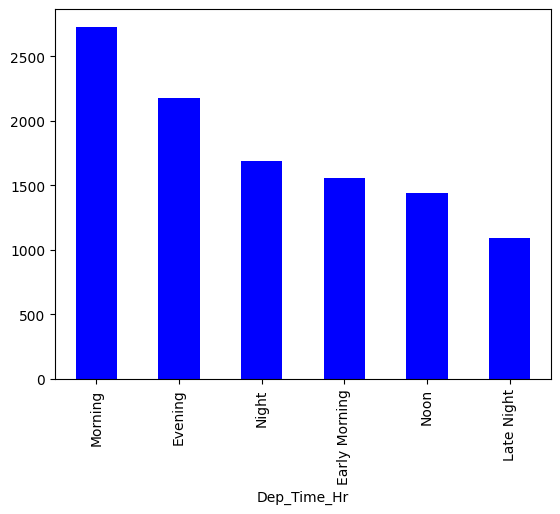

In [ ]:
train_data["Dep_Time_Hr"].apply(analyze).value_counts().plot(kind="bar", color="blue")

# Handle the duration feature

In [ ]:
train_data["Duration"]

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h
10681,2h 40m


In [ ]:
def repair(x):
  if 'h' not in x:
    x = '0h ' + x
  elif 'm' not in x:
    x = x + ' 0m'
  return x

In [ ]:
train_data["Duration"] = train_data["Duration"].apply(repair)

In [ ]:
train_data["Duration"]

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
"8h 20m".split(' ')

['8h', '20m']

In [ ]:
"8h 20m".split(' ')[0]

'8h'

In [ ]:
"8h 20m".split(' ')[0][0:-1]

'8'

In [ ]:
"8h 20m".split(' ')[1][0:-1]

'20'

In [ ]:
train_data["Duration_min"] = train_data["Duration"].apply(lambda x: x.split(' ')[1][0:-1])

In [ ]:
train_data["Duration_hr"] = train_data["Duration"].apply(lambda x: x.split(' ')[0][0:-1])

In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4


In [ ]:
eval("4*60+45*1")

285

In [ ]:
train_data["Total_Duration_minutes"] = train_data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [ ]:
train_data["Total_Duration_minutes"]

,Total_Duration_minutes
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4,285


<Axes: xlabel='Total_Duration_minutes', ylabel='Price'>

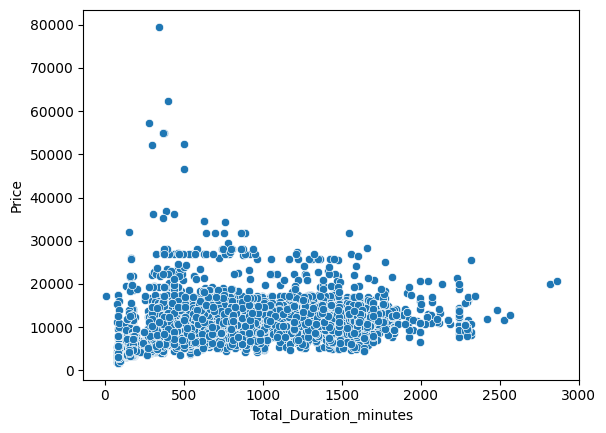

In [ ]:
sns.scatterplot(x="Total_Duration_minutes" , y = "Price" , data= train_data)

<Axes: xlabel='Total_Duration_minutes', ylabel='Price'>

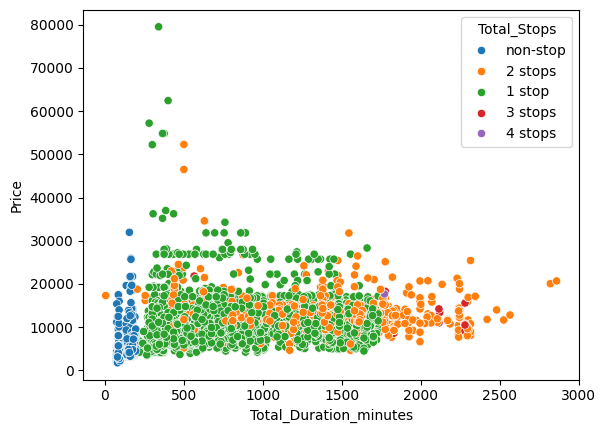

In [ ]:
sns.scatterplot(x="Total_Duration_minutes" , y = "Price" , data= train_data , hue = "Total_Stops")

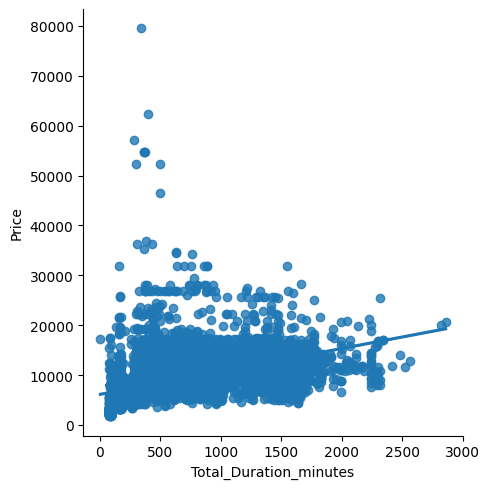

In [ ]:
sns.lmplot(x="Total_Duration_minutes" , y = "Price" , data= train_data)

# On which route jet airways is extremely used

In [ ]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,0,19,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,25,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,45,4,285


In [ ]:
df['Airline'] == 'Jet Airways'

,Airline
0,False
1,False
2,True
3,False
4,False
...,...
10678,False
10679,False
10680,True
10681,False


In [ ]:
df[df['Airline'] == 'Jet Airways'].groupby("Route").size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

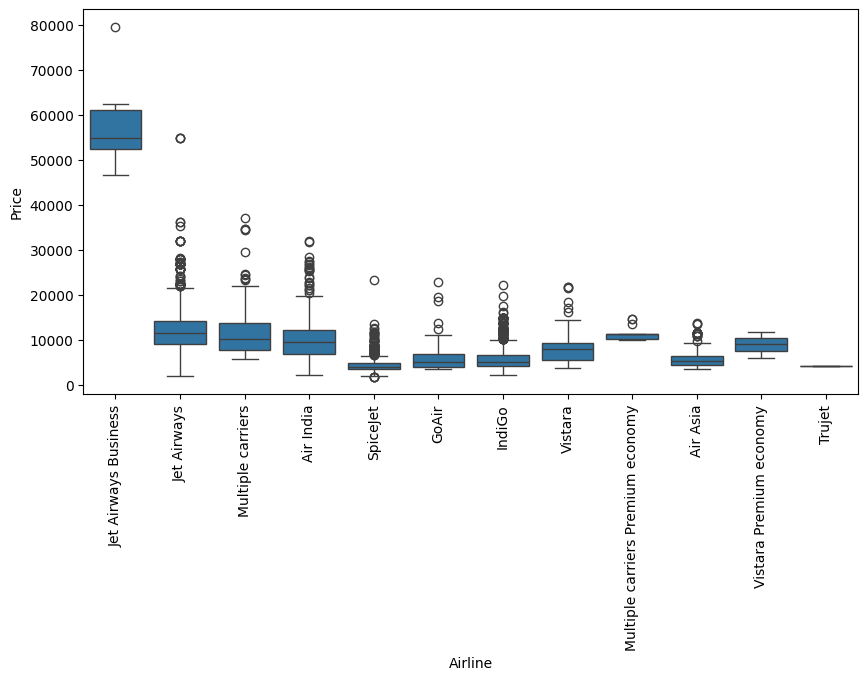

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Airline", y="Price", data=train_data.sort_values("Price", ascending=False))
plt.xticks(rotation='vertical')

# lets perform feature engineering

In [ ]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,50,2,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,25,7,445


In [ ]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
train_data["Source"].apply(lambda x : 1 if x=="Banglore" else 0)

,Source
0,1
1,0
2,0
3,0
4,1
...,...
10678,0
10679,0
10680,1
10681,1


In [ ]:
for i  in train_data["Source"].unique():
  train_data["Source_"+i] = train_data["Source"].apply(lambda x : 1 if x==i else 0)


In [ ]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,50,2,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,25,7,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,0,19,1140,0,0,1,0,0


In [ ]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
train_data['Airline'].nunique()

12

In [ ]:
train_data.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
ar = train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
ar


Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict = {val:key for key,val in enumerate(ar)}

In [ ]:
dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
train_data["Airline"] = train_data["Airline"].map(dict)

In [ ]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,50,2,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,25,7,445,0,1,0,0,0
2,10,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,0,19,1140,0,0,1,0,0


In [ ]:
train_data["Destination"]

,Destination
0,New Delhi
1,Banglore
2,Cochin
3,Banglore
4,New Delhi
...,...
10678,Banglore
10679,Banglore
10680,Delhi
10681,New Delhi


In [ ]:
train_data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
train_data["Destination"].str.replace('New Delhi','Delhi')

,Destination
0,Delhi
1,Banglore
2,Cochin
3,Banglore
4,Delhi
...,...
10678,Banglore
10679,Banglore
10680,Delhi
10681,Delhi


In [ ]:
ar = train_data.groupby(["Destination"])['Price'].mean().sort_values().index

In [ ]:
ar

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [ ]:
dict = {key:val for val,key in enumerate(ar)}

In [ ]:
dict

{'Kolkata': 0,
 'Hyderabad': 1,
 'Delhi': 2,
 'Banglore': 3,
 'Cochin': 4,
 'New Delhi': 5}

In [ ]:
train_data["Destination"] = train_data["Destination"].map(dict)

In [ ]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,50,2,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,25,7,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,...,4,25,0,19,1140,0,0,1,0,0


# Perform label encoding

In [ ]:
tr = train_data["Total_Stops"].unique()

In [ ]:
tr

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
def change(x):
  if x=='non-stop':
    return 0
  elif x=='1 stop':
    return 1
  elif x=='2 stops':
    return 2
  elif x=='3 stops':
    return 3
  elif x=='4 stops':
    return 4

In [ ]:
train_data['Total_Stops'] = train_data['Total_Stops'].apply(change)

In [ ]:
train_data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Total_Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,50,2,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,13,15,25,7,445,0,1,0,0,0
2,10,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,6,...,4,25,0,19,1140,0,0,1,0,0
3,3,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,23,30,25,5,325,0,1,0,0,0


# Finally dropping irrelevant features

In [ ]:
train_data.columns


Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_Time_Hr', 'Dep_Time_Min', 'Arrival_Time_Hr',
       'Arrival_Time_Min', 'Duration_min', 'Duration_hr',
       'Total_Duration_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
train_data.drop(columns=['Route','Duration','Additional_Info','Total_Duration_minutes','Source'],axis=1,inplace=True)

In [ ]:
train_data.head(3)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,24,3,2019,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,7662,1,5,2019,5,50,13,15,25,7,0,1,0,0,0
2,10,4,2,13882,9,6,2019,9,25,4,25,0,19,0,0,1,0,0


# Outlier Detection

In [ ]:
train_data.head(3)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,24,3,2019,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,7662,1,5,2019,5,50,13,15,25,7,0,1,0,0,0
2,10,4,2,13882,9,6,2019,9,25,4,25,0,19,0,0,1,0,0


In [ ]:
def plot(df, x):
  fig, (ax1,ax2,ax3) = plt.subplots(3,1)

  sns.distplot(df[x], ax = ax1)
  sns.boxplot(df[x], ax = ax2)
  sns.distplot(df[x], ax = ax3, kde=False)

<ipython-input-96-69b17f2de1d4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax = ax1)
<ipython-input-96-69b17f2de1d4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax = ax3, kde=False)


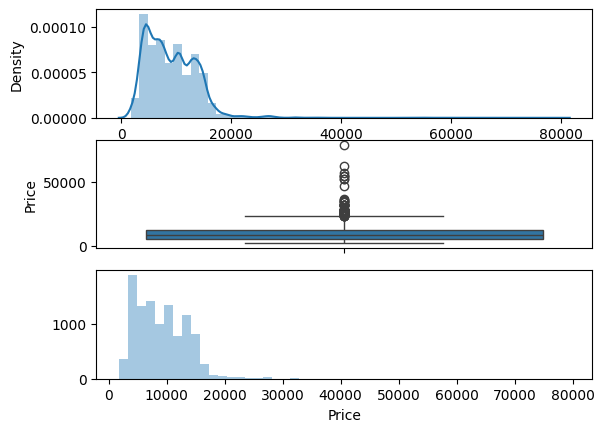

In [ ]:
plot(train_data, 'Price')

In [ ]:
q1 = train_data['Price'].quantile(0.25)
q2 = train_data['Price'].quantile(0.75)

iqr = q2 -q1

max = q2 + (1.5*iqr)
min = q1 - (1.5*iqr)

print(max)
print(min)

23017.0
-5367.0


In [ ]:
price = [i for i in train_data['Price'] if i > max or i < min]

In [ ]:
price

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26743,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 26890,
 25735,
 54826,
 26890,
 35185,
 79512,
 28097,
 27992,
 26890,
 25735,
 26092,
 31825,
 25913,
 25735,
 27992,
 31825,
 23267,
 62427,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 31825,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 27992,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 26890,
 23528,
 31825,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 57209,
 26890,
 31825,
 26480]

In [ ]:
len(price)

94

In [ ]:
train_data['Price'] = np.where(train_data['Price']>35000, train_data['Price'].median(), train_data['Price'])

<ipython-input-96-69b17f2de1d4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax = ax1)
<ipython-input-96-69b17f2de1d4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax = ax3, kde=False)


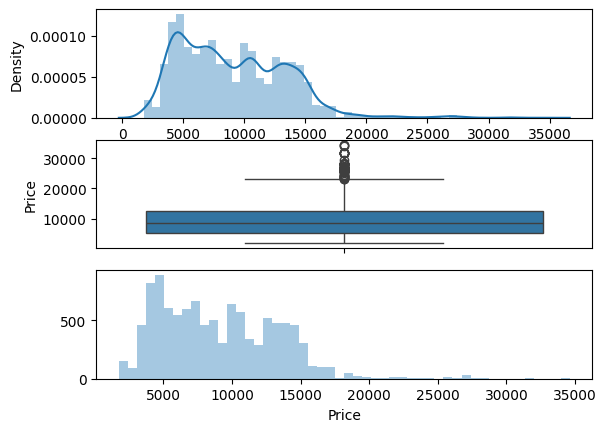

In [ ]:
plot(train_data, 'Price')

#lets perform feature selection

In [ ]:
train_data.head(3)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897.0,24,3,2019,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,7662.0,1,5,2019,5,50,13,15,25,7,0,1,0,0,0
2,10,4,2,13882.0,9,6,2019,9,25,4,25,0,19,0,0,1,0,0


In [ ]:
X = train_data.drop(['Price'],axis=1)

In [ ]:
y = train_data['Price']

In [ ]:
X

,Airline,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,24,3,2019,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,1,5,2019,5,50,13,15,25,7,0,1,0,0,0
2,10,4,2,9,6,2019,9,25,4,25,0,19,0,0,1,0,0
3,3,3,1,12,5,2019,18,5,23,30,25,5,0,1,0,0,0
4,3,5,1,1,3,2019,16,50,21,35,45,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,2019,19,55,22,25,30,2,0,1,0,0,0
10679,7,3,0,27,4,2019,20,45,23,20,35,2,0,1,0,0,0
10680,10,2,0,27,4,2019,8,20,11,20,0,3,1,0,0,0,0
10681,5,5,0,1,3,2019,11,30,14,10,40,2,1,0,0,0,0


In [ ]:
y

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0
...,...
10678,4107.0
10679,4145.0
10680,7229.0
10681,12648.0


In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
imp = mutual_info_regression(X,y)

In [ ]:
imp

array([1.31589324, 1.16623062, 0.79002174, 0.37225289, 0.63344176,
       0.00185174, 0.9255197 , 0.7681234 , 1.14791065, 0.89673053,
       0.68108846, 1.12205802, 0.38388032, 0.4476979 , 0.51673901,
       0.13260146, 0.20284583])

In [ ]:
imp = pd.DataFrame(imp, index=X.columns)

In [ ]:
imp

,0
Airline,1.315893
Destination,1.166231
Total_Stops,0.790022
Day_of_Journey,0.372253
Month_of_Journey,0.633442
Year_of_Journey,0.001852
Dep_Time_Hr,0.925520
Dep_Time_Min,0.768123
Arrival_Time_Hr,1.147911
Arrival_Time_Min,0.896731


In [ ]:
imp.columns = ['importance']

In [ ]:
imp

,importance
Airline,1.315893
Destination,1.166231
Total_Stops,0.790022
Day_of_Journey,0.372253
Month_of_Journey,0.633442
Year_of_Journey,0.001852
Dep_Time_Hr,0.925520
Dep_Time_Min,0.768123
Arrival_Time_Hr,1.147911
Arrival_Time_Min,0.896731


In [ ]:
imp.sort_values(by='importance', ascending=False)

,importance
Airline,1.315893
Destination,1.166231
Arrival_Time_Hr,1.147911
Duration_hr,1.122058
Dep_Time_Hr,0.925520
Arrival_Time_Min,0.896731
Total_Stops,0.790022
Dep_Time_Min,0.768123
Duration_min,0.681088
Month_of_Journey,0.633442


In [ ]:
train_data.drop(['Year_of_Journey'],axis=1,inplace=True)

In [ ]:
train_data.head(3)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_min,Duration_hr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897.0,24,3,22,20,1,10,50,2,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,25,7,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,0,19,0,0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

array([16890.12      ,  5518.2       ,  8879.02      , ...,
        6507.09      , 12640.30083333, 12843.14942857])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8128291292686345

#Lets save our model

In [ ]:
import pickle

In [ ]:
file = open(r'/content/gdrive/MyDrive/ml/rf_random.pkl' , 'wb')

In [ ]:
# dump information to that file
pickle.dump(ml_model , file)

In [ ]:
model = open(r'/content/gdrive/MyDrive/ml/rf_random.pkl' , 'rb')

In [ ]:
forest = pickle.load(model)

EOFError: Ran out of input

In [ ]:
import pickle

# ... (previous code to create ml_model)

# Open the file in write binary mode to store the model
file = open(r'/content/gdrive/MyDrive/ml/rf_random.pkl', 'wb')

# Dump the model into the file
pickle.dump(ml_model, file)

# Close the file to ensure data is written and resources are released
file.close()

# Open the file in read binary mode to load the model
model = open(r'/content/gdrive/MyDrive/ml/rf_random.pkl', 'rb')

# Load the model from the file
forest = pickle.load(model)

# Close the file after loading
model.close()

In [ ]:
y_pred2 = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test , y_pred2)

0.8128291292686345

In [ ]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(y_test , y_pred)

13.158803370414319

In [ ]:
from sklearn import metrics

In [ ]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9505499842694264
predictions are : [16728.06        5366.94        8899.37       ...  6520.21
 13039.04166667 13149.9245    ]


r2 score : 0.813607424959529
MAE : 1185.8917722361996
MSE : 3753069.1534553505
RMSE : 1937.283963040873
MAPE : 13.138739333929264


<ipython-input-139-a9cc87ea5131>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


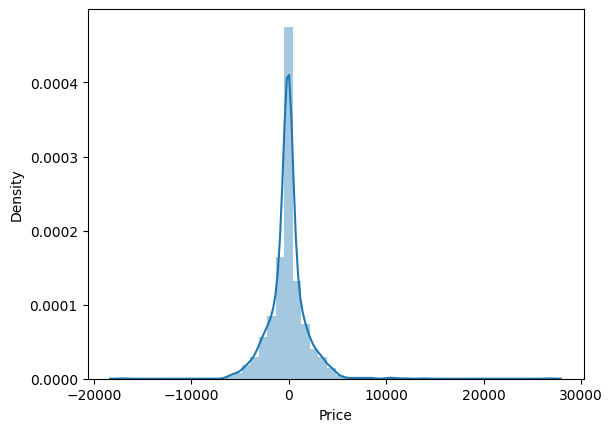

In [ ]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9651196669167478
predictions are : [16840.  4959.  9397. ...  6152. 13339. 14335.]


r2 score : 0.6886976558792435
MAE : 1402.032639213851
MSE : 6268163.980589221
RMSE : 2503.630160504786
MAPE : 15.162904628625054


<ipython-input-139-a9cc87ea5131>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


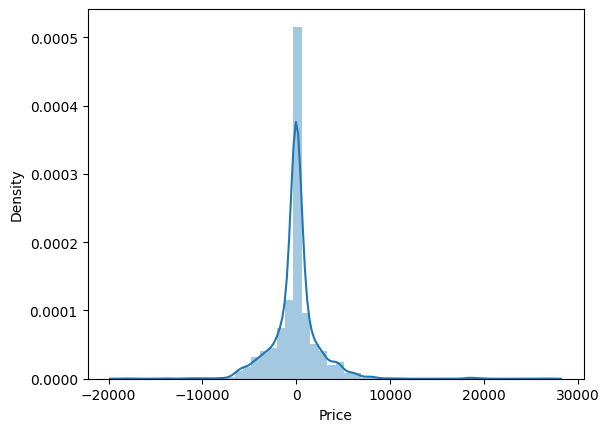

In [ ]:
predict(DecisionTreeRegressor())

In [ ]:
from sklearn.linear_model import LinearRegression

Training score : 0.60630980956962
predictions are : [12567.22801006  8298.56680704  8937.97289908 ...  6596.6752781
 11149.82346229 11398.38902553]


r2 score : 0.5852431409223944
MAE : 2011.4894387104234
MSE : 8351250.974724748
RMSE : 2889.8531060807827
MAPE : 24.30000657251128


<ipython-input-139-a9cc87ea5131>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


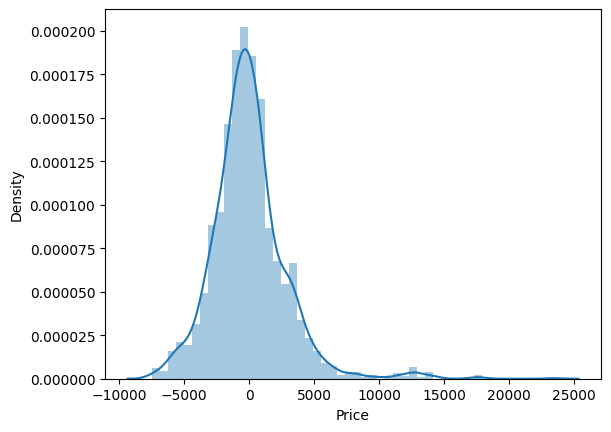

In [ ]:
predict(LinearRegression())

In [ ]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score : 0.08145114101813926
predictions are : [13377.  3597. 10262. ...  6442. 10844. 14781.]


r2 score : 0.05400355344965757
MAE : 3001.5924192793636
MSE : 19047915.841366403
RMSE : 4364.391806582723
MAPE : 35.60172007396983


<ipython-input-139-a9cc87ea5131>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


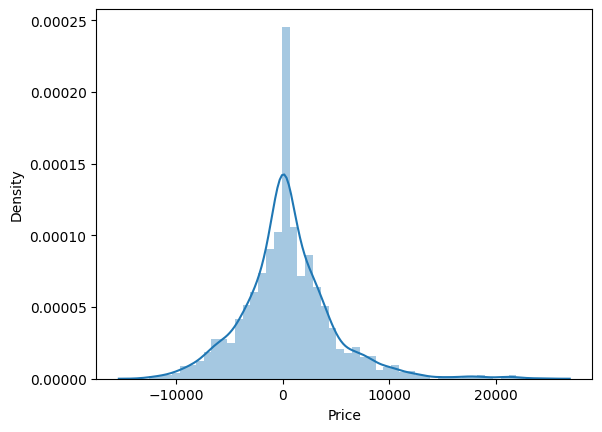

In [ ]:
predict(LogisticRegression())